# Read Library for Data Modelling (KNN)

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns

data_path = ['data']
traindir = ['train']
testdir = ['test']

## For Normal Dataset without Preprocessing

In [2]:
trainpath = os.sep.join(data_path + traindir + ['Train.csv'])

traindf = pd.read_csv(trainpath, sep = ",")
traindf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.6,0.25,0.30,14.40,0.052,40.0,183.0,0.99800,3.02,0.50,9.1,6
1,7.8,0.26,0.49,3.20,0.027,28.0,87.0,0.99190,3.03,0.32,11.3,7
2,6.3,0.23,0.33,1.50,0.036,15.0,105.0,0.99100,3.32,0.42,11.2,6
3,6.0,0.26,0.18,7.00,0.055,50.0,194.0,0.99591,3.21,0.43,9.0,5
4,7.9,0.37,0.31,2.85,0.037,5.0,24.0,0.99110,3.19,0.36,11.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3423,6.2,0.21,0.52,6.50,0.047,28.0,123.0,0.99418,3.22,0.49,9.9,6
3424,7.0,0.14,0.32,9.00,0.039,54.0,141.0,0.99560,3.22,0.43,9.4,6
3425,7.6,0.27,0.52,3.20,0.043,28.0,152.0,0.99129,3.02,0.53,11.4,6
3426,6.3,0.24,0.29,13.70,0.035,53.0,134.0,0.99567,3.17,0.38,10.6,6


In [3]:
testpath = os.sep.join(data_path + testdir + ['Test.csv'])

testdf = pd.read_csv(testpath, sep = ",")
testdf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.0,0.29,0.41,10.8,0.048,55.0,149.0,0.99370,3.09,0.59,10.966667,7
1,5.4,0.53,0.16,2.7,0.036,34.0,128.0,0.98856,3.20,0.53,13.200000,8
2,7.1,0.25,0.39,2.1,0.036,30.0,124.0,0.99080,3.28,0.43,12.200000,8
3,7.3,0.28,0.35,1.6,0.054,31.0,148.0,0.99178,3.18,0.47,10.700000,5
4,6.5,0.32,0.34,5.7,0.044,27.0,91.0,0.99184,3.28,0.60,12.000000,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,6.4,0.29,0.18,15.0,0.040,21.0,116.0,0.99736,3.14,0.50,9.200000,5
1466,6.4,0.30,0.33,5.2,0.050,30.0,137.0,0.99304,3.26,0.58,11.100000,5
1467,7.0,0.40,0.25,1.8,0.050,51.0,189.0,0.99174,3.00,0.55,11.400000,6
1468,6.8,0.36,0.24,4.6,0.039,24.0,124.0,0.99090,3.27,0.34,12.600000,7


In [4]:
X_train = traindf.drop("quality", axis=1)
X_test = testdf.drop("quality", axis=1)
y_train = traindf["quality"]
y_test = testdf["quality"]

In [5]:
#For Euclidean Distance for n_neighbors between 1 to 21
test_score_list = list()
train_score_list = list()

for k in range(1, 21):
    # use k as variable to learn k-nn model ranging from 1 to 20
    knn = KNeighborsClassifier(n_neighbors=k, p = 2)
    knn = knn.fit(X_train, y_train)
    
    #For Evaluate Test
    y_pred = knn.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    # append the test accuracies in score_list
    test_score_list.append((k,score))
    
    #For Evaluate Train
    y_pred = knn.predict(X_train)
    score = accuracy_score(y_train, y_pred)
    # append the test accuracies in score_list
    train_score_list.append((k,score))
    
test_score_df = pd.DataFrame(test_score_list, columns=['k', 'accuracy'])
train_score_df = pd.DataFrame(train_score_list, columns=['k', 'accuracy'])

Text(0, 0.5, 'accuracy')

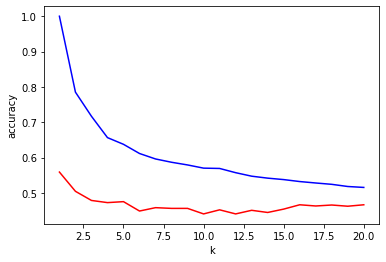

In [6]:
#Visualize the Accuracy between Train and Test
fig = plt.figure()
ax = plt.axes()

ax.plot(test_score_df.k, test_score_df.accuracy, color = "red")
ax.plot(train_score_df.k, train_score_df.accuracy, color = "blue")
plt.xlabel("k")
plt.ylabel("accuracy")

In [7]:
#What If set p = 1 (Manhattan Distance)
test_score_list = list()
train_score_list = list()

for k in range(1, 21):
    # use k as variable to learn k-nn model ranging from 1 to 20
    knn = KNeighborsClassifier(n_neighbors=k, p = 1)
    knn = knn.fit(X_train, y_train)
    
    #For Evaluate Test
    y_pred = knn.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    # append the test accuracies in score_list
    test_score_list.append((k,score))
    
    #For Evaluate Train
    y_pred = knn.predict(X_train)
    score = accuracy_score(y_train, y_pred)
    # append the test accuracies in score_list
    train_score_list.append((k,score))
    
test_score_df = pd.DataFrame(test_score_list, columns=['k', 'accuracy'])
train_score_df = pd.DataFrame(train_score_list, columns=['k', 'accuracy'])

Text(0, 0.5, 'accuracy')

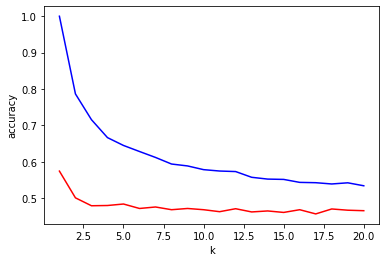

In [8]:
#Visualize the Accuracy between Train and Test
fig = plt.figure()
ax = plt.axes()

ax.plot(test_score_df.k, test_score_df.accuracy, color = "red")
ax.plot(train_score_df.k, train_score_df.accuracy, color = "blue")
plt.xlabel("k")
plt.ylabel("accuracy")

In [9]:
#Now use GridSearch CV to get the best model

#define the model and parameters
knn = KNeighborsClassifier()

parameters = {'n_neighbors': range(1,21),
                'p' : [1,2] }

model = GridSearchCV(knn, param_grid=parameters)
model = model.fit(X_train,y_train)
model.best_estimator_

KNeighborsClassifier(n_neighbors=1, p=1)

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           3     0.1250    0.1429    0.1333         7
           4     0.2647    0.2250    0.2432        40
           5     0.5556    0.5986    0.5763       426
           6     0.6348    0.6272    0.6310       668
           7     0.5385    0.5000    0.5185       280
           8     0.4167    0.4082    0.4124        49
           9     0.0000    0.0000    0.0000         0

    accuracy                         0.5741      1470
   macro avg     0.3622    0.3574    0.3593      1470
weighted avg     0.5737    0.5741    0.5735      1470



Text(0.5, 1.0, 'Confusion Matrix')

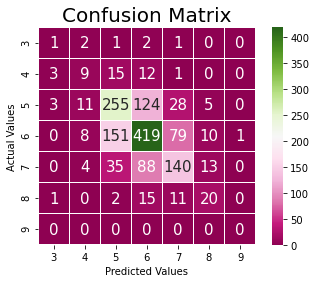

In [14]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, digits = 4))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'PiYG', annot_kws={"size": 15}, xticklabels = range(3,10), yticklabels=range(3,10));
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix", size = 20)

# Too Weak Try use Modified Dataset

In [2]:
trainpath = os.sep.join(data_path + traindir + ['Train_Modified.csv'])

traindf = pd.read_csv(trainpath, sep = ",")
traindf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.6,0.25,0.30,14.40,0.052,40.0,183.0,0.99800,3.02,0.50,9.1,Poor
1,7.8,0.26,0.49,3.20,0.027,28.0,87.0,0.99190,3.03,0.32,11.3,Good
2,6.3,0.23,0.33,1.50,0.036,15.0,105.0,0.99100,3.32,0.42,11.2,Poor
3,6.0,0.26,0.18,7.00,0.055,50.0,194.0,0.99591,3.21,0.43,9.0,Poor
4,7.9,0.37,0.31,2.85,0.037,5.0,24.0,0.99110,3.19,0.36,11.9,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...
3423,6.2,0.21,0.52,6.50,0.047,28.0,123.0,0.99418,3.22,0.49,9.9,Poor
3424,7.0,0.14,0.32,9.00,0.039,54.0,141.0,0.99560,3.22,0.43,9.4,Poor
3425,7.6,0.27,0.52,3.20,0.043,28.0,152.0,0.99129,3.02,0.53,11.4,Poor
3426,6.3,0.24,0.29,13.70,0.035,53.0,134.0,0.99567,3.17,0.38,10.6,Poor


In [3]:
testpath = os.sep.join(data_path + testdir + ['Test_Modified.csv'])

testdf = pd.read_csv(testpath, sep = ",")
testdf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.0,0.29,0.41,10.8,0.048,55.0,149.0,0.99370,3.09,0.59,10.966667,Good
1,5.4,0.53,0.16,2.7,0.036,34.0,128.0,0.98856,3.20,0.53,13.200000,Good
2,7.1,0.25,0.39,2.1,0.036,30.0,124.0,0.99080,3.28,0.43,12.200000,Good
3,7.3,0.28,0.35,1.6,0.054,31.0,148.0,0.99178,3.18,0.47,10.700000,Poor
4,6.5,0.32,0.34,5.7,0.044,27.0,91.0,0.99184,3.28,0.60,12.000000,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,6.4,0.29,0.18,15.0,0.040,21.0,116.0,0.99736,3.14,0.50,9.200000,Poor
1466,6.4,0.30,0.33,5.2,0.050,30.0,137.0,0.99304,3.26,0.58,11.100000,Poor
1467,7.0,0.40,0.25,1.8,0.050,51.0,189.0,0.99174,3.00,0.55,11.400000,Poor
1468,6.8,0.36,0.24,4.6,0.039,24.0,124.0,0.99090,3.27,0.34,12.600000,Good


In [4]:
X_train = traindf.drop("quality", axis=1)
X_test = testdf.drop("quality", axis=1)
y_train = traindf["quality"]
y_test = testdf["quality"]

In [18]:
#For Euclidean Distance for n_neighbors between 1 to 21
test_score_list = list()
train_score_list = list()

for k in range(1, 21):
    # use k as variable to learn k-nn model ranging from 1 to 20
    knn = KNeighborsClassifier(n_neighbors=k, p = 2)
    knn = knn.fit(X_train, y_train)
    
    #For Evaluate Test
    y_pred = knn.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    # append the test accuracies in score_list
    test_score_list.append((k,score))
    
    #For Evaluate Train
    y_pred = knn.predict(X_train)
    score = accuracy_score(y_train, y_pred)
    # append the test accuracies in score_list
    train_score_list.append((k,score))
    
test_score_df = pd.DataFrame(test_score_list, columns=['k', 'accuracy'])
train_score_df = pd.DataFrame(train_score_list, columns=['k', 'accuracy'])

Text(0, 0.5, 'accuracy')

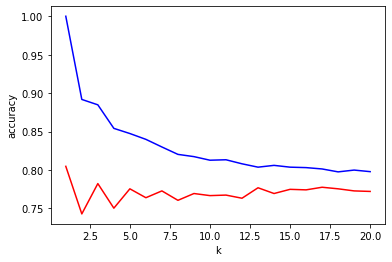

In [19]:
#Visualize the Accuracy between Train and Test
fig = plt.figure()
ax = plt.axes()

ax.plot(test_score_df.k, test_score_df.accuracy, color = "red")
ax.plot(train_score_df.k, train_score_df.accuracy, color = "blue")
plt.xlabel("k")
plt.ylabel("accuracy")

In [20]:
#What If set p = 1 (Manhattan Distance)
test_score_list = list()
train_score_list = list()

for k in range(1, 21):
    # use k as variable to learn k-nn model ranging from 1 to 20
    knn = KNeighborsClassifier(n_neighbors=k, p = 1)
    knn = knn.fit(X_train, y_train)
    
    #For Evaluate Test
    y_pred = knn.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    # append the test accuracies in score_list
    test_score_list.append((k,score))
    
    #For Evaluate Train
    y_pred = knn.predict(X_train)
    score = accuracy_score(y_train, y_pred)
    # append the test accuracies in score_list
    train_score_list.append((k,score))
    
test_score_df = pd.DataFrame(test_score_list, columns=['k', 'accuracy'])
train_score_df = pd.DataFrame(train_score_list, columns=['k', 'accuracy'])

Text(0, 0.5, 'accuracy')

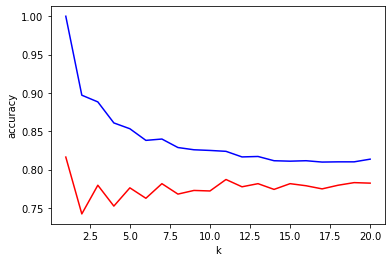

In [21]:
#Visualize the Accuracy between Train and Test
fig = plt.figure()
ax = plt.axes()

ax.plot(test_score_df.k, test_score_df.accuracy, color = "red")
ax.plot(train_score_df.k, train_score_df.accuracy, color = "blue")
plt.xlabel("k")
plt.ylabel("accuracy")

# Try to use Default Parameter

              precision    recall  f1-score   support

        Good     0.4979    0.3526    0.4128       329
        Poor     0.8278    0.8975    0.8612      1141

    accuracy                         0.7755      1470
   macro avg     0.6628    0.6250    0.6370      1470
weighted avg     0.7540    0.7755    0.7609      1470



Text(0.5, 1.0, 'Confusion Matrix')

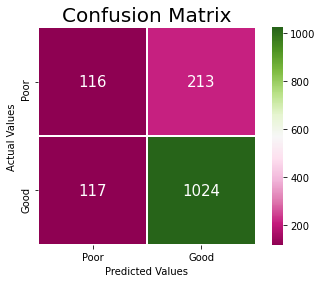

In [6]:
knn = KNeighborsClassifier().fit(X_train,y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, digits = 4))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'PiYG', annot_kws={"size": 15}, xticklabels=["Poor", "Good"], yticklabels=["Poor", "Good"]);
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix", size = 20)

In [22]:
#Now use GridSearch CV to get the best model
#define the model and parameters
knn = KNeighborsClassifier()

parameters = {'n_neighbors': range(1,21),
                'p' : [1,2] }

model = GridSearchCV(knn, param_grid=parameters)
model = model.fit(X_train,y_train)
model.best_estimator_

KNeighborsClassifier(n_neighbors=1, p=1)

              precision    recall  f1-score   support

        Good     0.5955    0.5593    0.5768       329
        Poor     0.8751    0.8904    0.8827      1141

    accuracy                         0.8163      1470
   macro avg     0.7353    0.7249    0.7298      1470
weighted avg     0.8125    0.8163    0.8142      1470



Text(0.5, 1.0, 'Confusion Matrix')

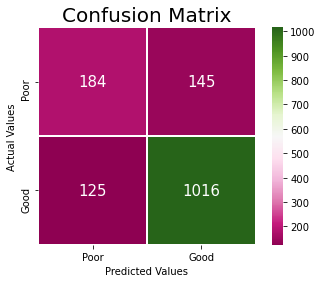

In [24]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, digits = 4))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'PiYG', annot_kws={"size": 15}, xticklabels=["Poor", "Good"], yticklabels=["Poor", "Good"]);
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix", size = 20)

# Close to 80%?
- Try to use StandardScaler to Improve Accuracy.
- Try to add one more attributes of KNN Classifier which is 'Weights'
- Try to increase the maximum for n_neighbors to 31
- Try to add new parameter for GridSearchCV called 'scoring' to accuracy

In [14]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [15]:
#Now use GridSearch CV to get the best model
#define the model and parameters
knn = KNeighborsClassifier()

parameters = {'n_neighbors': range(1,31),
              'p' : [1,2],
              'weights' : ['uniform', 'distance']}

model = GridSearchCV(knn, param_grid=parameters, scoring = 'accuracy')
model = model.fit(X_train,y_train)
model.best_estimator_

KNeighborsClassifier(n_neighbors=20, weights='distance')

              precision    recall  f1-score   support

        Good     0.7796    0.5805    0.6655       329
        Poor     0.8873    0.9527    0.9189      1141

    accuracy                         0.8694      1470
   macro avg     0.8335    0.7666    0.7922      1470
weighted avg     0.8632    0.8694    0.8621      1470



Text(0.5, 1.0, 'Confusion Matrix')

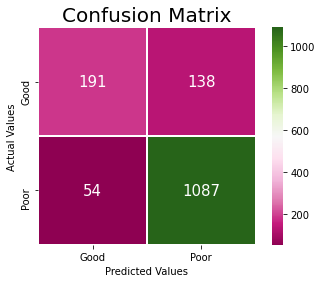

In [16]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, digits = 4))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'PiYG', annot_kws={"size": 15}, xticklabels=["Good", "Poor"], yticklabels=["Good", "Poor"]);
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix", size = 20)

# Overall Accuracy in Final KNN Model = 86.94%

In [8]:
model.best_estimator_.n_samples_fit_

3428